In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from FillBetween3D import fill_between_3d

In [184]:
df = pd.read_csv("./data/COMPOSED.csv")
countries = list(df["Country"])
# 确保三个指标都是经过归一化处理的，数值都在0-1内
V_0,V_1,V_2 = list(df["complex_HH"]),list(df["complex_PUB"]),list(df["complex_PRIV"])

weights = np.array([0.4,0.25,0.35]) 
scale_func = np.vectorize(lambda x: x/max(weights)) # 根据权重调整三条棱的长度
scales = scale_func(weights)
scales

array([1.   , 0.625, 0.875])

In [175]:
def gravity(xes,yes,zes):
    # 得到三维空间中三角形的重心坐标
    return np.array([xes.sum()/3,yes.sum()/3,zes.sum()/3])

def newVertex_func(vertex,rootVertex,scale):
    # 根据两个点和缩放比来确定改变后一个点的位置
    # 在本程序中rootVertex一直为绝对顶点(见后方代码注释)
    # vertex: (x,y,z)
    res = []
    for d in range(3):
        d_value = vertex[d]
        root = rootVertex[d]
        res.append(root + (d_value - root) * scale)
    return res


def getXYZ(type:str,vertexes):
    # 返回一系列点的x或y或z坐标合集
    # type: "x", "y", "z"
    # vertexes: 一系列点的合集
    XYZ_dict = dict(x=0,y=1,z=2)
    XYZ = XYZ_dict[type]
    return np.array(list(map(lambda x:x[XYZ],vertexes)))

[(0.6470588235294118, 0.0, 0.14901960784313725, 0.1), (0.6547481737793157, 0.007381776239907728, 0.14917339484813533, 0.1), (0.6624375240292195, 0.014763552479815456, 0.1493271818531334, 0.1), (0.6701268742791234, 0.022145328719723183, 0.14948096885813147, 0.1), (0.6778162245290273, 0.02952710495963091, 0.14963475586312958, 0.1), (0.6855055747789311, 0.03690888119953864, 0.14978854286812765, 0.1), (0.6931949250288351, 0.044290657439446365, 0.14994232987312572, 0.1), (0.700884275278739, 0.0516724336793541, 0.1500961168781238, 0.1), (0.7085736255286429, 0.05905420991926182, 0.15024990388312187, 0.1), (0.7162629757785467, 0.06643598615916955, 0.15040369088811995, 0.1), (0.7239523260284506, 0.07381776239907728, 0.15055747789311805, 0.1), (0.7316416762783545, 0.081199538638985, 0.15071126489811612, 0.1), (0.7393310265282584, 0.08858131487889273, 0.1508650519031142, 0.1), (0.7470203767781622, 0.09596309111880046, 0.15101883890811227, 0.1), (0.7547097270280662, 0.1033448673587082, 0.151172625

Text(0.5, 0, 'Z')

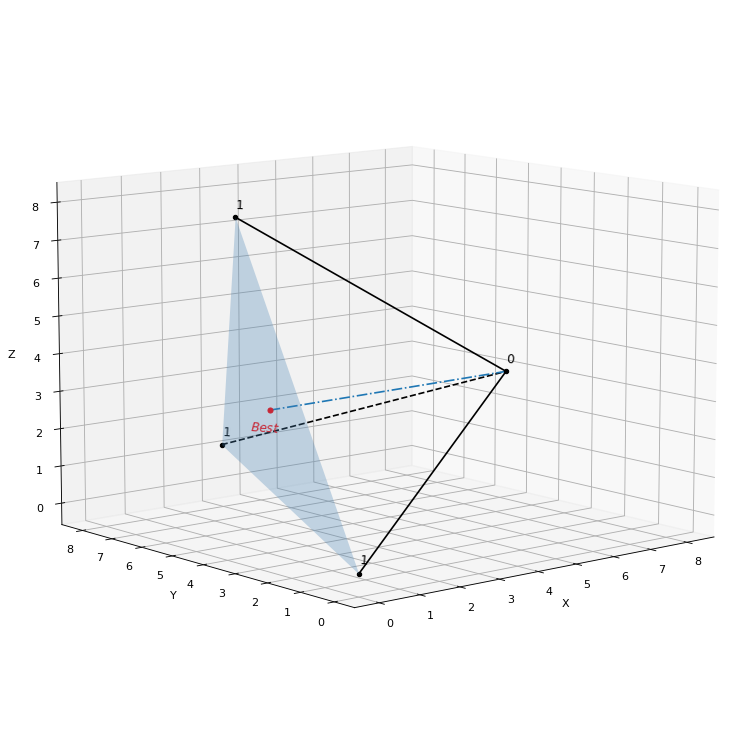

In [183]:
ax = plt.figure(figsize=(16,12),dpi=80).add_subplot(projection="3d")


# ===== 绘制评价四面体 =====
edge_length = 10 # 最长边长
# 正四面体顶点
r_vertexes = np.array([
    [0,0,0],
    [0,edge_length,0],
    [0,edge_length/2,edge_length/2*np.sqrt(3)],
    [np.sqrt(6)*edge_length/3,edge_length/2,edge_length/2/np.sqrt(3)] # 以此为绝对顶点
])
# 评价四面体顶点
vertexes = np.array(list(map(lambda x: newVertex_func(x[1],r_vertexes[3],scales[x[0]]),enumerate(r_vertexes[:3])))) # 得到除绝对顶点外的其他顶点经过缩放棱长的坐标
vertexes = np.append(vertexes,[r_vertexes[-1]],axis=0)


Xes = getXYZ("x",vertexes=vertexes)
Yes = getXYZ("y",vertexes=vertexes)
Zes = getXYZ("z",vertexes=vertexes)

bottom_center = gravity(Xes[:3],Yes[:3],Zes[:3]) # 底面重心坐标

mainLinesStyle = ["-","--","-"]
for i in range(3): # 画出评价指标所代表的三条线段
    ax.plot(Xes[[i,3]],Yes[[i,3]],Zes[[i,3]],c="k",lw=1.5,ls=mainLinesStyle[i])
    # 标注指标名称
    # if i == 2: # 由于2被遮挡,需要单独在外部标出



# 加入底面重心坐标
Xes = np.append(Xes,bottom_center[0])
Yes = np.append(Yes,bottom_center[1])
Zes = np.append(Zes,bottom_center[2])

zdir_set = (1,-2,1/18)
ax.plot(Xes[[4,3]],Yes[[4,3]],Zes[[4,3]],"-.") # 绝对顶点与底面重心的连线
ax.scatter([bottom_center[0]],[bottom_center[1]],[bottom_center[2]],c="red",s=20)
ax.text(bottom_center[0]-.5,bottom_center[1],bottom_center[2]-.5,"$Best$",zdir=zdir_set,color="red",fontsize=11) # 与最后的ax.view_init对应

for i in range(4): # 标注评价四面体四个顶点表示的占比(1或者0)
    label = "1" if i <= 2 else "0"
    ax.scatter([Xes[i]],[Yes[i]],[Zes[i]],c="k",s=15)
    ax.text(Xes[i]+.1,Yes[i]+.1,Zes[i]+.2,label,zdir=zdir_set,c="k",fontsize=11)

# 底面绘制
line1 = [Xes[[0,1]],Yes[[0,1]],Zes[[0,1]]]
line2 = [Xes[[0,2]],Yes[[0,2]],Zes[[0,2]]]
fill_between_3d(ax,*line1,*line2,mode=1,alpha=.3)

# ===== 画上数据 =====
cmap = plt.get_cmap("RdYlGn")
colors = [cmap(i) for i in range(len(countries))]
Alpha = .1
def changeAlpha(color,alpha):
    color = list(color)
    color[3] = alpha
    color = tuple(color)
    return color
colors_with_alpha = list(map(lambda c: changeAlpha(c,Alpha), colors))


for index in range(len(countries)):
    pass
    


ax.view_init(10,-130)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# ax.set_axis_off() # 隐藏坐标轴